In [2]:
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("C:/Users/Marcelina/Desktop/InfP/IO/lab06/diabetes.csv")
df_norm = df[['pregnant-times', 'glucose-concentr', 'blood-pressure', 'skin-thickness', 'insulin', 'mass-index', 'pedigree-func', 'age']
    ].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
target = df[['class']].replace(['tested_negative','tested_positive'],[0,1])
df = pd.concat([df_norm, target], axis=1)
train, test = train_test_split(df, test_size = 0.3)
trainX = train[['pregnant-times','glucose-concentr','blood-pressure','skin-thickness','insulin','mass-index','pedigree-func','age']]
trainY = train['class']
testX = test[['pregnant-times','glucose-concentr','blood-pressure','skin-thickness','insulin','mass-index','pedigree-func','age']]
testY = test['class']

Epoch 1/500
17/17 [==============================] - 1s 19ms/step - loss: 0.3501 - val_loss: 0.3223
Epoch 2/500
17/17 [==============================] - 0s 6ms/step - loss: 0.3376 - val_loss: 0.3102
Epoch 3/500
17/17 [==============================] - 0s 6ms/step - loss: 0.3212 - val_loss: 0.2857
Epoch 4/500
17/17 [==============================] - 0s 5ms/step - loss: 0.2929 - val_loss: 0.2501
Epoch 5/500
17/17 [==============================] - 0s 5ms/step - loss: 0.2583 - val_loss: 0.2255
Epoch 6/500
17/17 [==============================] - 0s 5ms/step - loss: 0.2413 - val_loss: 0.2179
Epoch 7/500
17/17 [==============================] - 0s 6ms/step - loss: 0.2344 - val_loss: 0.2163
Epoch 8/500
17/17 [==============================] - 0s 5ms/step - loss: 0.2325 - val_loss: 0.2146
Epoch 9/500
17/17 [==============================] - 0s 6ms/step - loss: 0.2300 - val_loss: 0.2126
Epoch 10/500
17/17 [==============================] - 0s 5ms/step - loss: 0.2278 - val_loss: 0.2107
Epoch 11

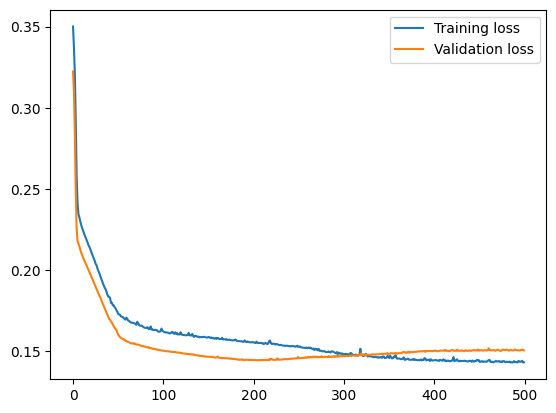

In [4]:
model = Sequential([
    Dense(6, activation='relu', input_shape=(8,)),
    Dense(3, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=500)
y_pred = model.predict(testX)
accuracy = accuracy_score(testY, y_pred.round())
print("Dokładność: {:.2f}%".format(accuracy * 100))
conf_mat = confusion_matrix(testY, y_pred.round())
print("Macierz błędów:")
print(conf_mat)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

Krzywa przedstawia zmianę wartości funkcji straty (loss) w czasie, w trakcie uczenia modelu. Na osi poziomej znajdują się kolejne epoki, a na osi pionowej wartość funkcji straty.

Jeśli wartość funkcji straty maleje zarówno na zbiorze treningowym, jak i na zbiorze walidacyjnym, to model jest dobrze dopasowany i uczenie można kontynuować.

Jeśli wartość funkcji straty na zbiorze walidacyjnym przestaje maleć, a na zbiorze treningowym nadal spada, oznacza to, że model zaczyna się przeuczać. W takiej sytuacji warto zatrzymać proces uczenia, aby uniknąć dalszego dopasowywania się modelu do zbioru treningowego.

Jeśli zaś wartość funkcji straty jest wysoka zarówno na zbiorze treningowym, jak i walidacyjnym, oznacza to, że model jest niedouczony i wymaga dalszego treningu.

In [8]:
# Architektura sieci neuronowej

from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="Diabetes model", view=True)

Funkcja kompilująca model

In [31]:
def compile_model(activation, optimizer, loss):
    model = Sequential([
        Dense(6, activation=activation, input_shape=(8,)),
        Dense(3, activation=activation),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss=loss)
    history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=300)
    y_pred = model.predict(testX)
    print_accuracy_confmat_plot(y_pred, testY, history)
    
def print_accuracy_confmat_plot(y_pred, testY, history):
    accuracy = accuracy_score(testY, y_pred.round())
    print("Dokładność: {:.2f}%".format(accuracy * 100))

    conf_mat = confusion_matrix(testY, y_pred.round())
    print("Macierz błędów:")
    print(conf_mat)

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()

Różne konfiguracje modelu

Epoch 1/300
17/17 [==============================] - 1s 15ms/step - loss: 0.2872 - val_loss: 0.2538
Epoch 2/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2582 - val_loss: 0.2355
Epoch 3/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2425 - val_loss: 0.2264
Epoch 4/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2349 - val_loss: 0.2232
Epoch 5/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2313 - val_loss: 0.2226
Epoch 6/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2305 - val_loss: 0.2225
Epoch 7/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2299 - val_loss: 0.2225
Epoch 8/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2297 - val_loss: 0.2224
Epoch 9/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2295 - val_loss: 0.2225
Epoch 10/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2293 - val_loss: 0.2223
Epoch 11

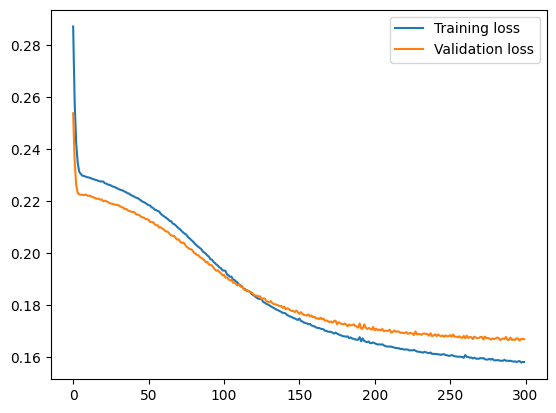

In [32]:
# Funkcja aktywacji sigmoidalna, optymalizator adam, funkcja straty mse
compile_model('sigmoid', 'adam', 'mse')

Epoch 1/300
17/17 [==============================] - 1s 16ms/step - loss: 1.8850 - val_loss: 1.4696
Epoch 2/300
17/17 [==============================] - 0s 6ms/step - loss: 1.2582 - val_loss: 0.9344
Epoch 3/300
17/17 [==============================] - 0s 6ms/step - loss: 0.7929 - val_loss: 0.5729
Epoch 4/300
17/17 [==============================] - 0s 6ms/step - loss: 0.4997 - val_loss: 0.3796
Epoch 5/300
17/17 [==============================] - 0s 6ms/step - loss: 0.3566 - val_loss: 0.3055
Epoch 6/300
17/17 [==============================] - 0s 6ms/step - loss: 0.3041 - val_loss: 0.2864
Epoch 7/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2904 - val_loss: 0.2821
Epoch 8/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2853 - val_loss: 0.2792
Epoch 9/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2806 - val_loss: 0.2748
Epoch 10/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2761 - val_loss: 0.2701
Epoch 11

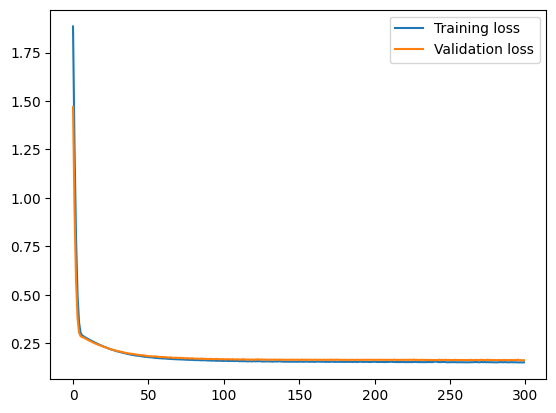

In [33]:
# Funkcja aktywacji tangens hiperboliczny, optymalizator adam, funkcja straty mse
compile_model('tanh', 'adam', 'mse')

Epoch 1/300
17/17 [==============================] - 1s 14ms/step - loss: 0.2880 - val_loss: 0.2142
Epoch 2/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2263 - val_loss: 0.2095
Epoch 3/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2227 - val_loss: 0.2063
Epoch 4/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2202 - val_loss: 0.2041
Epoch 5/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2181 - val_loss: 0.2015
Epoch 6/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2162 - val_loss: 0.1996
Epoch 7/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2145 - val_loss: 0.1983
Epoch 8/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2127 - val_loss: 0.1977
Epoch 9/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2112 - val_loss: 0.1973
Epoch 10/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2102 - val_loss: 0.1961
Epoch 11

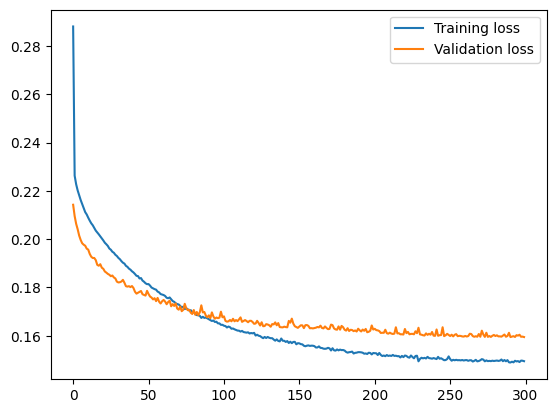

In [36]:
# Funkcja aktywacji relu, optymalizator SGD (gradient funkcji kosztu), funkcja straty mse
compile_model('relu', 'SGD', 'mse')

Epoch 1/300
17/17 [==============================] - 1s 15ms/step - loss: 0.3048 - val_loss: 0.2430
Epoch 2/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2388 - val_loss: 0.2286
Epoch 3/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2307 - val_loss: 0.2265
Epoch 4/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2291 - val_loss: 0.2255
Epoch 5/300
17/17 [==============================] - 0s 7ms/step - loss: 0.2282 - val_loss: 0.2245
Epoch 6/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2269 - val_loss: 0.2235
Epoch 7/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2261 - val_loss: 0.2227
Epoch 8/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2248 - val_loss: 0.2214
Epoch 9/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2240 - val_loss: 0.2208
Epoch 10/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2229 - val_loss: 0.2198
Epoch 11

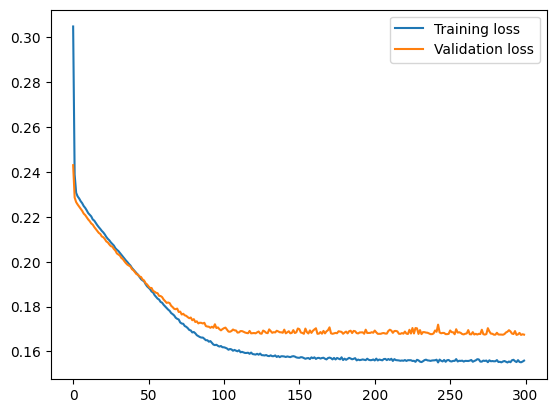

In [40]:
# Funkcja aktywacji sigmoidalna, optymalizator SGD (gradient funkcji kosztu), funkcja straty mse
compile_model('tanh', 'SGD', 'mse')

Epoch 1/300
17/17 [==============================] - 1s 15ms/step - loss: 0.3086 - val_loss: 0.2316
Epoch 2/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2360 - val_loss: 0.2259
Epoch 3/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2313 - val_loss: 0.2240
Epoch 4/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2286 - val_loss: 0.2230
Epoch 5/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2266 - val_loss: 0.2202
Epoch 6/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2246 - val_loss: 0.2190
Epoch 7/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2224 - val_loss: 0.2181
Epoch 8/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2206 - val_loss: 0.2164
Epoch 9/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2189 - val_loss: 0.2147
Epoch 10/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2175 - val_loss: 0.2126
Epoch 11

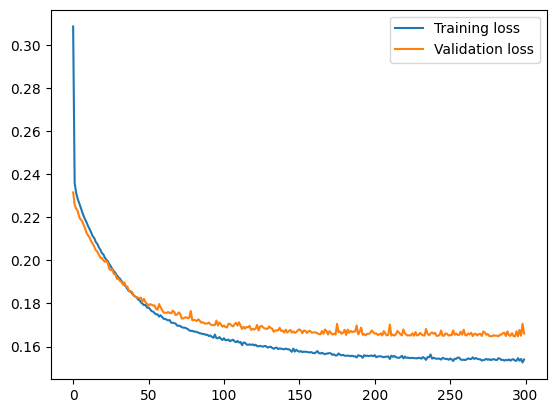

In [37]:
# Funkcja aktywacji tangens hiperboliczny, optymalizator SGD, funkcja straty mse
compile_model('tanh', 'SGD', 'mse')

Epoch 1/300
17/17 [==============================] - 1s 17ms/step - loss: 0.2743 - val_loss: 0.2767
Epoch 2/300
17/17 [==============================] - 0s 7ms/step - loss: 0.2742 - val_loss: 0.2767
Epoch 3/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2742 - val_loss: 0.2766
Epoch 4/300
17/17 [==============================] - 0s 5ms/step - loss: 0.2741 - val_loss: 0.2766
Epoch 5/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2741 - val_loss: 0.2765
Epoch 6/300
17/17 [==============================] - 0s 8ms/step - loss: 0.2740 - val_loss: 0.2765
Epoch 7/300
17/17 [==============================] - 0s 9ms/step - loss: 0.2739 - val_loss: 0.2765
Epoch 8/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2739 - val_loss: 0.2764
Epoch 9/300
17/17 [==============================] - 0s 7ms/step - loss: 0.2738 - val_loss: 0.2764
Epoch 10/300
17/17 [==============================] - 0s 6ms/step - loss: 0.2738 - val_loss: 0.2764
Epoch 11

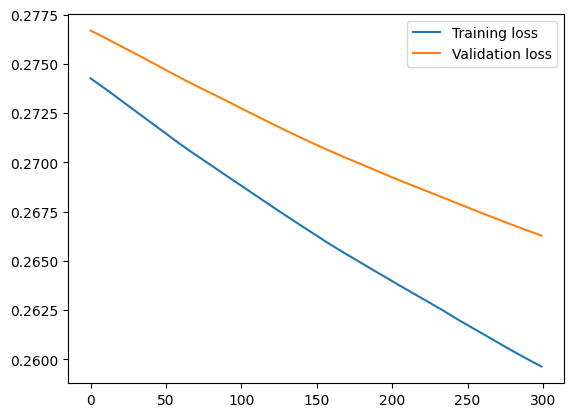

In [38]:
# Funkcja aktywacji relu, optymalizator adadelta, funkcja straty mse
compile_model('relu', 'adadelta', 'mse')

Epoch 1/300
17/17 [==============================] - 1s 15ms/step - loss: 0.8819 - val_loss: 0.9106
Epoch 2/300
17/17 [==============================] - 0s 5ms/step - loss: 0.8817 - val_loss: 0.9104
Epoch 3/300
17/17 [==============================] - 0s 5ms/step - loss: 0.8814 - val_loss: 0.9101
Epoch 4/300
17/17 [==============================] - 0s 5ms/step - loss: 0.8812 - val_loss: 0.9099
Epoch 5/300
17/17 [==============================] - 0s 5ms/step - loss: 0.8810 - val_loss: 0.9097
Epoch 6/300
17/17 [==============================] - 0s 6ms/step - loss: 0.8808 - val_loss: 0.9094
Epoch 7/300
17/17 [==============================] - 0s 5ms/step - loss: 0.8805 - val_loss: 0.9092
Epoch 8/300
17/17 [==============================] - 0s 5ms/step - loss: 0.8803 - val_loss: 0.9089
Epoch 9/300
17/17 [==============================] - 0s 5ms/step - loss: 0.8800 - val_loss: 0.9087
Epoch 10/300
17/17 [==============================] - 0s 5ms/step - loss: 0.8798 - val_loss: 0.9084
Epoch 11

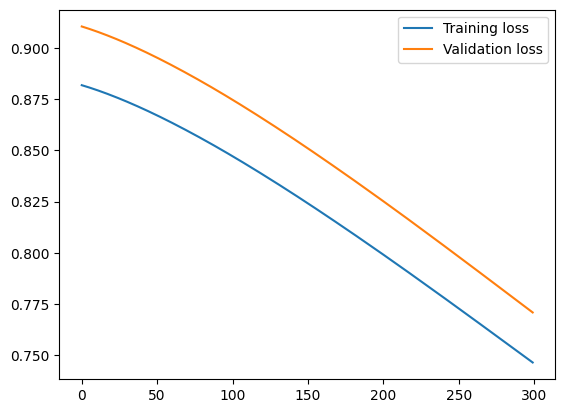

In [39]:
# Funkcja aktywacji sigmoidalna, optymalizator adadelta, funkcja straty mse
compile_model('sigmoid', 'adadelta', 'mse')

Epoch 1/300
17/17 [==============================] - 1s 15ms/step - loss: 0.3116 - val_loss: 0.3304
Epoch 2/300
17/17 [==============================] - 0s 6ms/step - loss: 0.3114 - val_loss: 0.3302
Epoch 3/300
17/17 [==============================] - 0s 6ms/step - loss: 0.3112 - val_loss: 0.3300
Epoch 4/300
17/17 [==============================] - 0s 6ms/step - loss: 0.3110 - val_loss: 0.3297
Epoch 5/300
17/17 [==============================] - 0s 6ms/step - loss: 0.3108 - val_loss: 0.3295
Epoch 6/300
17/17 [==============================] - 0s 6ms/step - loss: 0.3106 - val_loss: 0.3293
Epoch 7/300
17/17 [==============================] - 0s 6ms/step - loss: 0.3104 - val_loss: 0.3291
Epoch 8/300
17/17 [==============================] - 0s 5ms/step - loss: 0.3102 - val_loss: 0.3289
Epoch 9/300
17/17 [==============================] - 0s 6ms/step - loss: 0.3099 - val_loss: 0.3287
Epoch 10/300
17/17 [==============================] - 0s 6ms/step - loss: 0.3097 - val_loss: 0.3284
Epoch 11

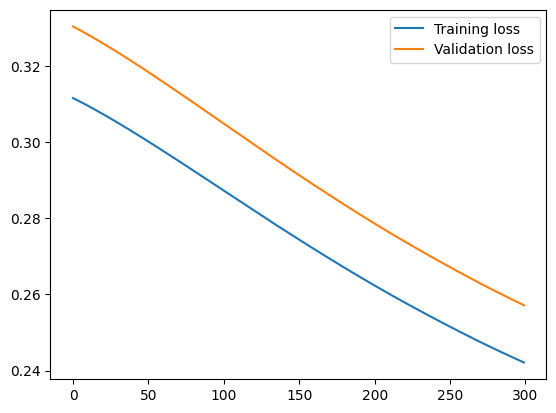

In [35]:
# Funkcja aktywacji tangens hiperboliczny, optymalizator adadelta, funkcja straty mse
compile_model('tanh', 'adadelta', 'mse')